In [1]:
%load_ext rpy2.ipython

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cp /content/drive/MyDrive/CSVs/* ./

In [6]:
%%R
data <- read.csv('/content/Apple_stock.csv')

In [7]:
%%R
summary(data)

     Date                High            Low             Open      
 Length:253         Min.   :36.43   Min.   :35.50   Min.   :35.99  
 Class :character   1st Qu.:46.83   1st Qu.:45.71   1st Qu.:46.21  
 Mode  :character   Median :51.12   Median :50.39   Median :50.78  
                    Mean   :52.41   Mean   :51.52   Mean   :51.92  
                    3rd Qu.:56.15   3rd Qu.:55.20   3rd Qu.:55.77  
                    Max.   :73.49   Max.   :72.38   Max.   :72.78  
     Close           Volume            Adj.Close    
 Min.   :35.55   Min.   : 45448000   Min.   :34.56  
 1st Qu.:46.43   1st Qu.: 83962000   1st Qu.:45.43  
 Median :50.73   Median :103526800   Median :49.76  
 Mean   :52.01   Mean   :112233031   Mean   :51.02  
 3rd Qu.:55.90   3rd Qu.:128186000   3rd Qu.:54.99  
 Max.   :73.41   Max.   :365248800   Max.   :72.44  


In [8]:
%%R
head(data)

        Date    High     Low    Open   Close    Volume Adj.Close
1 2018-12-31 39.8400 39.1200 39.6325 39.4350 140014000  38.33848
2 2019-01-02 39.7125 38.5575 38.7225 39.4800 148158800  38.38223
3 2019-01-03 36.4300 35.5000 35.9950 35.5475 365248800  34.55908
4 2019-01-04 37.1375 35.9500 36.1325 37.0650 234428400  36.03437
5 2019-01-07 37.2075 36.4750 37.1750 36.9825 219111200  35.95417
6 2019-01-08 37.9550 37.1300 37.3900 37.6875 164101200  36.63956


In [9]:
%%R
library(tidyverse)
library(knitr)        

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.4     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [10]:
%%R
install.packages("fpp2")
library(tidyverse)
library(fpp2)          

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘expsmooth’, ‘fma’, ‘forecast’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/xts_0.12.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 517875 bytes (505 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

In [11]:
# create training and validation of the Google stock data
%%R
install.packages("forecast")
install.packages("MLmetrics")
library(forecast)
library(MLmetrics)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/forecast_8.15.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 584703 bytes (570 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

## SES Simple Exponential Smoothing

In [12]:
%%R
head(goog)
goog.train <- window(goog, end = 900)
goog.test <- window(goog, start = 901)

# create training and validation of the AirPassengers data
qcement.train <- window(qcement, end = c(2012, 4))
qcement.test <- window(qcement, start = c(2013, 1))

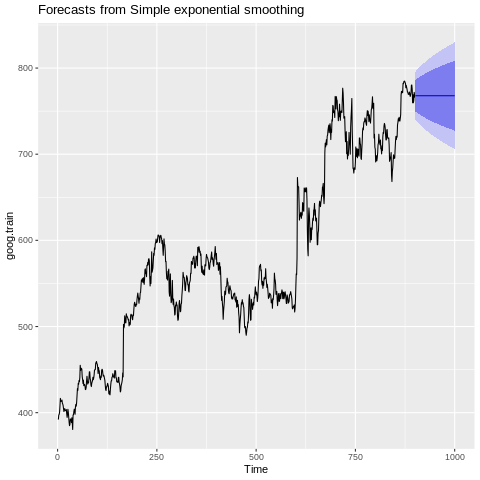

In [13]:
%%R
ses.goog <- ses(goog.train, alpha = .2, h = 100)
autoplot(ses.goog)

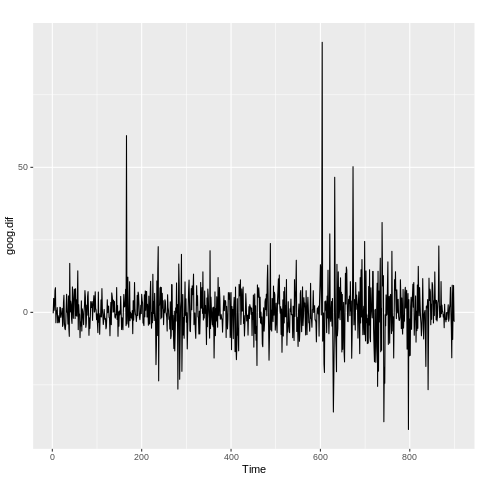

In [14]:
%%R
goog.dif <- diff(goog.train)
autoplot(goog.dif)

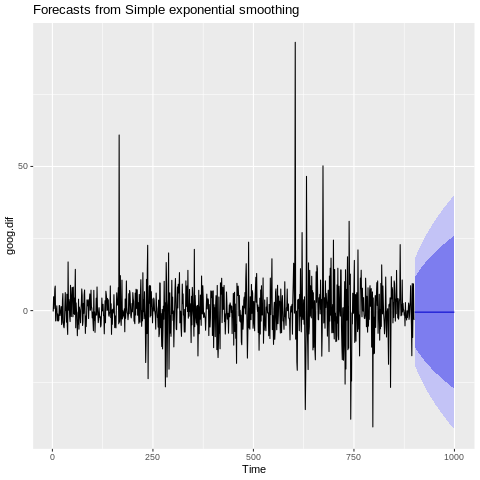

In [15]:
%%R
ses.goog.dif <- ses(goog.dif, alpha = .2, h = 100)
autoplot(ses.goog.dif)


In [16]:
%%R
goog.dif.test <- diff(goog.test)
accuracy(ses.goog.dif, goog.dif.test)

                      ME     RMSE      MAE       MPE     MAPE      MASE
Training set -0.01368221 9.317223 6.398819  99.97907 253.7069 0.7572009
Test set      0.97219517 8.141450 6.117483 109.93320 177.9684 0.7239091
                    ACF1 Theil's U
Training set -0.05440377        NA
Test set      0.12278141 0.9900678


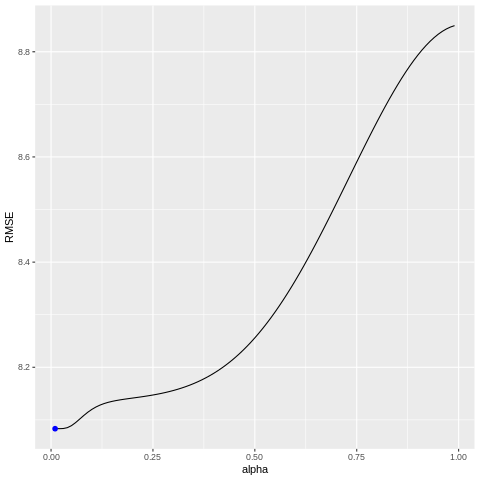

In [17]:
%%R
# identify optimal alpha parameter
alpha <- seq(.01, .99, by = .01)
RMSE <- NA
for(i in seq_along(alpha)) {
  fit <- ses(goog.dif, alpha = alpha[i], h = 100)
  RMSE[i] <- accuracy(fit, goog.dif.test)[2,2]
}

# convert to a data frame and idenitify min alpha value
alpha.fit <- data_frame(alpha, RMSE)
alpha.min <- filter(alpha.fit, RMSE == min(RMSE))

# plot RMSE vs. alpha
ggplot(alpha.fit, aes(alpha, RMSE)) +
  geom_line() +
  geom_point(data = alpha.min, aes(alpha, RMSE), size = 2, color = "blue")

In [18]:
%%R
install.packages('gridExtra')
library(gridExtra)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/gridExtra_2.3.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1062844 bytes (1.0 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

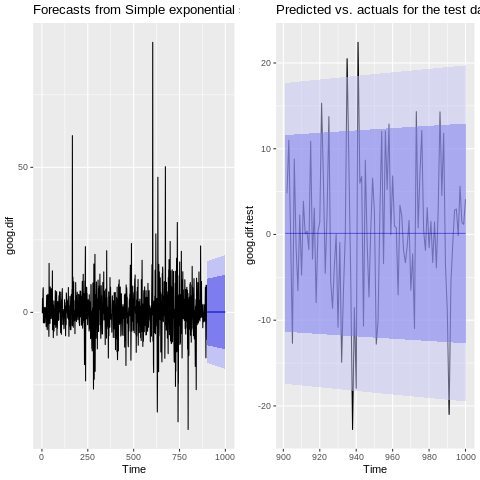

In [19]:
%%R
# refit model with alpha = .05
ses.goog.opt <- ses(goog.dif, alpha = .05, h = 100)

# performance eval
accuracy(ses.goog.opt, goog.dif.test)
##                        ME     RMSE      MAE       MPE     MAPE      MASE
## Training set -0.005965793 9.088108 6.187613 116.75670 158.7963 0.7141413
## Test set      0.002419984 8.653976 6.297980  94.29215 102.7317 0.7268792
##                    ACF1 Theil's U
## Training set 0.01712706        NA
## Test set     0.16841378 0.9790798

# plotting results
p1 <- autoplot(ses.goog.opt) +
  theme(legend.position = "bottom")
p2 <- autoplot(goog.dif.test) +
  autolayer(ses.goog.opt, alpha = .5) +
  ggtitle("Predicted vs. actuals for the test data set")

gridExtra::grid.arrange(p1, p2, nrow = 1)

## Holt’s Method

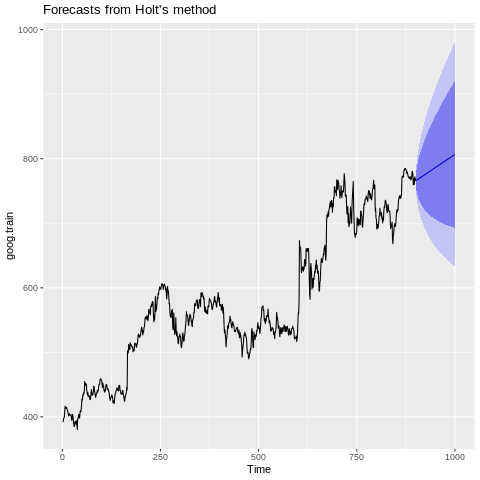

In [20]:
%%R
holt.goog <- holt(goog.train, h = 100)
autoplot(holt.goog)

In [21]:
%%R
holt.goog$model

Holt's method 

Call:
 holt(y = goog.train, h = 100) 

  Smoothing parameters:
    alpha = 0.9999 
    beta  = 1e-04 

  Initial states:
    l = 401.1276 
    b = 0.4091 

  sigma:  8.8149

     AIC     AICc      BIC 
10045.74 10045.81 10069.75 


In [22]:
%%R
accuracy(holt.goog, goog.test)

                       ME      RMSE       MAE         MPE     MAPE     MASE
Training set -0.003332796  8.795267  5.821057 -0.01211821 1.000720 1.002452
Test set      0.545744415 16.328680 12.876836  0.03013427 1.646261 2.217538
                   ACF1 Theil's U
Training set 0.03100836        NA
Test set     0.87733298  2.024518


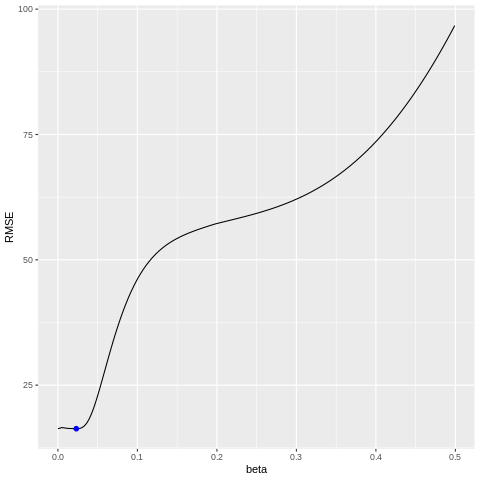

In [23]:
%%R
# identify optimal alpha parameter
beta <- seq(.0001, .5, by = .001)
RMSE <- NA
for(i in seq_along(beta)) {
  fit <- holt(goog.train, beta = beta[i], h = 100)
  RMSE[i] <- accuracy(fit, goog.test)[2,2]
}

# convert to a data frame and idenitify min alpha value
beta.fit <- data_frame(beta, RMSE)
beta.min <- filter(beta.fit, RMSE == min(RMSE))

# plot RMSE vs. alpha
ggplot(beta.fit, aes(beta, RMSE)) +
  geom_line() +
  geom_point(data = beta.min, aes(beta, RMSE), size = 2, color = "blue")

In [24]:
%%R
# new model with optimal beta
holt.goog.opt <- holt(goog.train, h = 100, beta = 0.0601)

# accuracy of first model
accuracy(holt.goog, goog.test)
##                        ME      RMSE       MAE         MPE     MAPE
## Training set -0.003922069  8.938319  5.974921 -0.01188414 1.004290
## Test set     -8.945342029 21.099897 16.268344 -1.15371296 2.039945
##                   MASE       ACF1 Theil's U
## Training set 0.9997514 0.03746482        NA
## Test set     2.7220944 0.89540070  2.481272

# accuracy of new optimal model
accuracy(holt.goog.opt, goog.test)
##                       ME      RMSE       MAE         MPE     MAPE     MASE
## Training set -0.01098347  9.109332  6.218278 -0.00502392 1.043517 1.040471
## Test set     -0.33180592 18.536622 14.287508 -0.09452438 1.780052 2.390652
##                    ACF1 Theil's U
## Training set 0.01293146        NA
## Test set     0.88797970  2.156113

                      ME      RMSE       MAE          MPE     MAPE     MASE
Training set -0.01493114  8.960214  6.058869 -0.005524151 1.039572 1.043406
Test set     21.41138275 28.549029 23.841097  2.665066997 2.988712 4.105709
                    ACF1 Theil's U
Training set 0.009696325        NA
Test set     0.895371665  3.435763


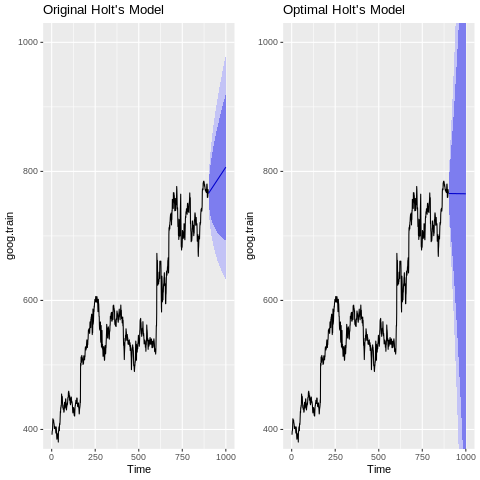

In [25]:
%%R
p1 <- autoplot(holt.goog) +
  ggtitle("Original Holt's Model") +
  coord_cartesian(ylim = c(400, 1000))

p2 <- autoplot(holt.goog.opt) +
  ggtitle("Optimal Holt's Model") +
  coord_cartesian(ylim = c(400, 1000))

gridExtra::grid.arrange(p1, p2, nrow = 1)

## HoltWinter Method


In [26]:
%%R
HoltWinters.goog <- HoltWinters(goog.train, beta=FALSE, gamma=FALSE)
HoltWinters.goog

Holt-Winters exponential smoothing without trend and without seasonal component.

Call:
HoltWinters(x = goog.train, beta = FALSE, gamma = FALSE)

Smoothing parameters:
 alpha: 0.9999297
 beta : FALSE
 gamma: FALSE

Coefficients:
      [,1]
a 765.7002


In [27]:
%%R
HoltWinters.goog$fitted

Time Series:
Start = 2 
End = 900 
Frequency = 1 
        xhat    level
  2 392.8300 392.8300
  3 392.5121 392.5121
  4 397.3056 397.3056
  5 398.0113 398.0113
  6 400.4900 400.4900
  7 408.0952 408.0952
  8 416.5899 416.5899
  9 413.0041 413.0041
 10 413.6098 413.6098
 11 413.0734 413.0734
 12 414.7126 414.7126
 13 411.1312 411.1312
 14 409.9885 409.9885
 15 408.1157 408.1157
 16 404.5192 404.5192
 17 401.2853 401.2853
 18 403.0385 403.0385
 19 404.7225 404.7225
 20 403.0089 403.0089
 21 402.5369 402.5369
 22 402.2041 402.2041
 23 403.5850 403.5850
 24 398.7369 398.7369
 25 394.5293 394.5293
 26 398.0061 398.0061
 27 403.8927 403.8927
 28 400.4954 400.4954
 29 394.9665 394.9665
 30 388.9954 388.9954
 31 384.9217 384.9217
 32 386.3123 386.3123
 33 392.5365 392.5365
 34 392.6412 392.6412
 35 392.4724 392.4724
 36 388.4389 388.4389
 37 394.1212 394.1212
 38 388.7519 388.7519
 39 380.4809 380.4809
 40 397.3494 397.3494
 41 397.4698 397.4698
 42 401.3394 401.3394
 43 404.0965 404.0965
 44 

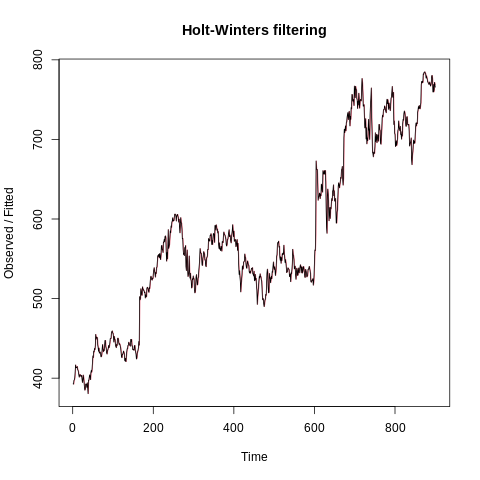

In [28]:
%%R
plot(HoltWinters.goog)

In [29]:
%%R
HoltWinters.goog$SSE

[1] 69692.67
